https://towardsdatascience.com/stop-hard-coding-in-a-data-science-project-use-config-files-instead-479ac8ffc76f

# How to use config files to change parameters easily

In Projects, normally, there are certain values we will need to change frequently, such as file names, features, hyperparameters, etc...

#*Loading information*<br>
data = pd.read_csv("***Data/daily-bike-share.csv***")

#*Drop unnecessary columns*<br>
data = data.drop(columns="***instant***")

#*Split independent and dependent variables*<br>
X = data.drop("***rentals***",axis=1)
y = data["***rentals***"]

#*Train-test split*<br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=***0.2***, random_state=***123***)

#*Create pipeline*<br>
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])

#*Grid search hyperparameters*<br>
hyperparameters = {
    "n_estimators" : [int(x) for x in np.linspace(start = ***200***, stop = ***2000***, num = ***10***)],
    "max_features" : ["***auto***", "***sqrt***"]
}
rf_model = GridSearchCV(pipeline, hyperparameters, cv=***2***, scoring="***accuracy***",verbose=3)

#*Fitting model*<br>
rf_model(X_train, y_train)

#*Save model*<br>
joblib.dump(rf_model, './rf_model.pkl')

It's easy to hardcode this values, but:
 <ul>
    <li>Maintainability: What will you do if the feature names change? </li>
    <li>Reusability: What will you do if you want to test new scenarios or change hyperparameters?</li>
    <li>Security: Are you sure you should write the credentials of your database directly into the code?</li>
</ul>

If you are worried about these things as much as me, you should use configuration files:
 <ul>
    <li>Allows you to store parameters separately from the code, which improves code maintainability and readability. </li>
    <li>You can easily modify project configurations without modifying the code itself.</li>
    <li>When deploying a data science project to a production environment, a config file enables easy customization of settings specific to the production environment without the need for code modifications. </li>
</ul>

There are numerous Python libraries available for creating configuration files such as pyyaml, configparser, ConfigObj. However, the one i'm using nowadays is configparser

First of all, we import the library and create the instance with the necessary object 

In [8]:
import configparser

config = configparser.ConfigParser()

['DATA', 'variables', 'train_test_split']


Then, we read the file that contains the information. 
Attention: We should keep this structure. In square brackets "[]" the section and after that: "name of the configuration = value"<br>
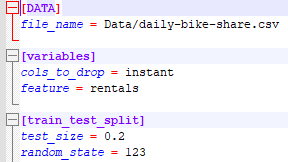

In [20]:
config.read('./config/appconfig.cfg')
print(config.sections())

['DATA', 'variables', 'train_test_split']


Finally, we are going to use the method "get" to assign the value in the configuration file to a variable that we will use in the script

In [21]:
file_name = config.get("DATA", "file_name")
cols_to_drop = config.get("variables", "cols_to_drop")
dep_var = config.get("variables", "feature")
test_size = config.get("train_test_split", "test_size")
random_state = config.get("train_test_split", "random_state")

In the rest of the script we will do as we already know

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import joblib


#*Loading information*
data = pd.read_csv(file_name)

#*Drop unnecessary columns*
data = data.drop(columns=cols_to_drop)

#*Split independent and dependent variables*
X = data.drop(dep_var,axis=1)
y = data[dep_var]

#*Train-test split*
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(test_size), random_state=int(random_state))

#*Create preprocessor*
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 


#*Create pipeline*
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])

rf_model = pipeline.fit(X_train, y_train)
print (rf_model)

#*Save model*
joblib.dump(rf_model, 'models/rf_model.pkl')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                        

['models/rf_model.pkl']